# Lab 10  Neural Networks
- **Author:** Dimitris Papadimitriou ([dimitri@berkeley.edu](mailto:dimitri@berkeley.edu))
- **Date:** 8 April 2020
- **Course:** INFO 251: Applied machine learning

In [1]:
import pandas as pd
import numpy as np
import os
import time
from matplotlib import gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import IPython
import tensorflow as tf
import graphviz 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline


c:\users\dimitris\miniconda3\envs\drl2\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\dimitris\miniconda3\envs\drl2\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\dimitris\miniconda3\envs\drl2\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\dimitris\miniconda3\envs\drl2\lib\site-packages\tensorf

### Topics:
1. AdaBoost http://cs229.stanford.edu/notes/cs229-notes3.pdf
2. Neural Networks https://www.tensorflow.org/tutorials/
http://rail.eecs.berkeley.edu/deeprlcourse/static/slides/lec-3.pdf

## Data: 
Cancer dataset. Labels malignant or benign. Features include mean radius, mean texture, mean perimeter etc 

In [2]:
cancer = datasets.load_breast_cancer()
print("######## Features ########")
print("Features: ", cancer.feature_names)
print("######## Labels ########")
# 0-malignant, 1-benign
print("Labels: ", cancer.target_names)
print("######## Size ########")
print("{} data points and with {} features".format(cancer.data.shape[0],cancer.data.shape[1]))



######## Features ########
Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
######## Labels ########
Labels:  ['malignant' 'benign']
######## Size ########
569 data points and with 30 features


## Feature selection

SelectKBest selects the k highest scoring features according to a specified criterion.

For example, in a classification scenario with mutual information criterion:

-- SelectKBest computes a score between each feature of X and y

-- Score: Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

https://en.wikipedia.org/wiki/Mutual_information

-- Small values mean independence between the feature and the labels.

-- Large value shows non-random dependence and hence good features.

-- Keep K best scoring features



In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# Split data in train and test sets
# 80% train 20% test

X_total = cancer.data
y = cancer.target
# 
selector = SelectKBest(mutual_info_classif, k=2)
X = selector.fit_transform(X_total, y)
# Chosen features selector.get_support()

features = cancer.feature_names[selector.get_support()]
#IPython.embed()

#X = X_total[:, 0:10]
#IPython.embed()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) 


## Decision Trees

In [74]:
from sklearn import tree
from sklearn.model_selection import KFold, train_test_split

In [75]:
# useful params: criterion='entropy', max_depth (for prunning)
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 4)
model.fit(X_train, y_train)
print(model.get_n_leaves())
print(model.get_depth())
predict_labels = model.predict(X_test)
print("Accuracy of decision tree is {}".format(sum(predict_labels==y_test)/len(y_test)))

11
4
Accuracy of decision tree is 0.9210526315789473


## Feature importance
 

Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen

https://stats.stackexchange.com/questions/311488/summing-feature-importance-in-scikit-learn-for-a-set-of-features

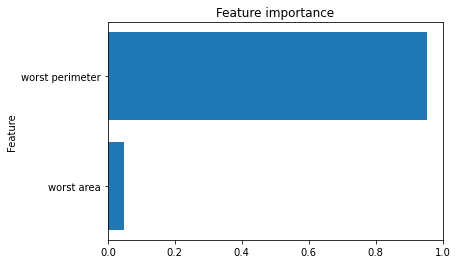

In [23]:
features_plot = features
importances = model.feature_importances_
idx = np.argsort(importances)
plt.title("Feature importance")
plt.barh(range(len(idx)), importances[idx])
plt.yticks(range(len(idx)), [features[i] for i in idx])
plt.ylabel("Feature")
plt.show()

## Plot tree

In [72]:
# this package is helpful in plotting the trees
dot_data = tree.export_graphviz(model, out_file=None,
                                class_names=['benign','malignant'], 
                                feature_names=features,
                                special_characters=True, max_depth=3)
graph = graphviz.Source(dot_data)
graph

NameError: name 'features' is not defined

[Text(198.23684210526318, 195.696, 'X[0] <= 114.4\nentropy = 0.957\nsamples = 455\nvalue = [172, 283]'),
 Text(96.91578947368421, 152.208, 'X[0] <= 101.65\nentropy = 0.521\nsamples = 316\nvalue = [37, 279]'),
 Text(35.242105263157896, 108.72, 'X[0] <= 85.095\nentropy = 0.205\nsamples = 249\nvalue = [8, 241]'),
 Text(17.621052631578948, 65.232, 'entropy = 0.0\nsamples = 130\nvalue = [0, 130]'),
 Text(52.863157894736844, 65.232, 'X[1] <= 514.9\nentropy = 0.355\nsamples = 119\nvalue = [8, 111]'),
 Text(35.242105263157896, 21.744, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(70.48421052631579, 21.744, 'entropy = 0.296\nsamples = 115\nvalue = [6, 109]'),
 Text(158.58947368421053, 108.72, 'X[1] <= 888.9\nentropy = 0.987\nsamples = 67\nvalue = [29, 38]'),
 Text(123.34736842105264, 65.232, 'X[1] <= 762.5\nentropy = 0.965\nsamples = 59\nvalue = [23, 36]'),
 Text(105.72631578947369, 21.744, 'entropy = 0.954\nsamples = 16\nvalue = [10, 6]'),
 Text(140.96842105263158, 21.744, 'entropy = 0.

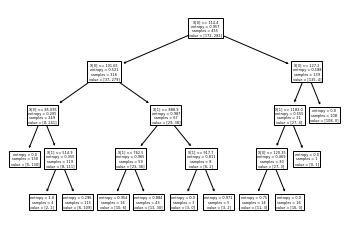

In [44]:
tree.plot_tree(model)

## Random Forests

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [51]:
from sklearn.ensemble import RandomForestClassifier
k = 5
clf = RandomForestClassifier(criterion='entropy', max_depth=k)
# params: n_estimators=100 (number of trees in the forest), criterion (eg entropy),
# max_features how many features at each split defualt max_features=sqrt(n_features)
clf.fit(X_train, y_train)
predict_labels = clf.predict(X_test)
print("Accuracy of decision tree is {}".format(sum(predict_labels==y_test)/len(y_test)))


Accuracy of decision tree is 0.9473684210526315


## Neural Networks: Tensorflow

### Tensorflow operation examples

In [84]:

import tensorflow as tf

# Basic constant operations
a = tf.constant(2)
b = tf.constant(3)
# or like that
c = 4

# Launch the default graph.
with tf.Session() as sess:
    print("a=2, b=3")
    print("Addition with constants: %i" % sess.run(a+b))
    print("Multiplication with constants: %i" % sess.run(a*b))
    print("Addition with constants: %i" % sess.run(a+c))



a=2, b=3
Addition with constants: 5
Multiplication with constants: 6
Addition with constants: 6


In [42]:
# Random variables and varaible initialization
rand_t = tf.random_uniform([5], -10, 10, dtype=tf.int32, seed=0)
rand_var_1 = tf.Variable(rand_t)
rand_var_2 = tf.Variable(rand_t)

# or array of zeros (similar for array of ones etc)
rand_var_3 = tf.Variable(tf.zeros([2, 3]))

init = tf.initialize_all_variables()

with tf.Session() as sess:
    # Run every operation with variable input
    sess.run(init)  
    print("random uniform from 0 to 10 {}".format(sess.run(rand_var_1)))
    print("random uniform  from -10 to 10 {}".format(sess.run(rand_var_2)))
    print("relu activation {}".format(sess.run(tf.nn.relu(rand_var_2))))
    print("constant {}".format(sess.run(rand_var_3)))


Instructions for updating:
Use `tf.global_variables_initializer` instead.
random uniform from 0 to 10 [-9  3  8 -5  3]
random uniform  from -10 to 10 [-9  3  8 -5  3]
relu activation [0 3 8 0 3]
constant [[0. 0. 0.]
 [0. 0. 0.]]


In [87]:
# bad practice but you can switch between numpy and tensorflow operations
# Random variables
rand_var_1 = np.random.rand(4,1)
with tf.Session() as sess:
    print("relu activation {}".format(sess.run(tf.nn.relu(tf.sqrt(rand_var_1)))))
    print("relu activation {}".format(sess.run(tf.nn.relu(np.sqrt(rand_var_1)))))


relu activation [[0.97070041]
 [0.85819073]
 [0.48832816]
 [0.90761981]]
relu activation [[0.97070041]
 [0.85819073]
 [0.48832816]
 [0.90761981]]


In [88]:
# Basic Operations with variable as graph input
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)

# Launch the default graph.
with tf.Session() as sess:
    # Run every operation with variable input
    print("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))


Addition with variables: 5
Multiplication with variables: 6


In [90]:
matrix1 = tf.constant([[3., 3.]])

matrix2 = tf.constant([[2.],[4.]])


product1 = tf.matmul(matrix1, matrix2)

with tf.Session() as sess:
    result1 = sess.run(product1)
    print(result1)
    

[[18.]]


In [91]:
# more advanced functions    
matrix2 = tf.constant([[-2.],[4.]])
product2 = tf.nn.sigmoid(matrix2)

with tf.Session() as sess:
    result2 = sess.run(product2)
    print(result2)

[[0.11920292]
 [0.98201376]]


## Tensorflow regression example

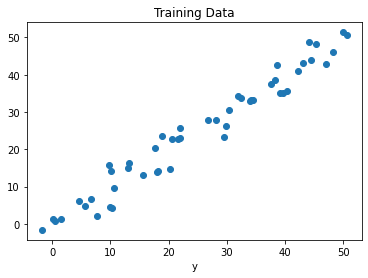

In [77]:
# Example from GeeksforGeeks
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

np.random.seed(101) 
tf.set_random_seed(101) 


# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
  
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
  
n = len(x) # Number of data points 

# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [110]:
X = tf.placeholder(tf.float32) 
Y = tf.placeholder(tf.float32) 
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 
learning_rate = 0.01
training_epochs = 1000

In [111]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

In [112]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        # stochastic, in practice remember to shuffle your data or sample randomly and not sequentially
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
        # gradient descent
        # sess.run(optimizer, feed_dict = {X : x, Y : y}) 
    
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = nan W = nan b = nan
Epoch 100 : cost = nan W = nan b = nan
Epoch 150 : cost = nan W = nan b = nan
Epoch 200 : cost = nan W = nan b = nan
Epoch 250 : cost = nan W = nan b = nan
Epoch 300 : cost = nan W = nan b = nan
Epoch 350 : cost = nan W = nan b = nan
Epoch 400 : cost = nan W = nan b = nan
Epoch 450 : cost = nan W = nan b = nan
Epoch 500 : cost = nan W = nan b = nan
Epoch 550 : cost = nan W = nan b = nan
Epoch 600 : cost = nan W = nan b = nan
Epoch 650 : cost = nan W = nan b = nan
Epoch 700 : cost = nan W = nan b = nan
Epoch 750 : cost = nan W = nan b = nan
Epoch 800 : cost = nan W = nan b = nan
Epoch 850 : cost = nan W = nan b = nan
Epoch 900 : cost = nan W = nan b = nan
Epoch 950 : cost = nan W = nan b = nan
Epoch 1000 : cost = nan W = nan b = nan


In [ ]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

## Tensorflow neural network example

In [3]:
## =================================================================
## =================================================================
from __future__ import print_function
import os
cwd = os.getcwd()
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# Import MNIST data
#from tensorflow.examples.tutorials.m import input_data
#mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## =================================================================
## =================================================================
## Import Spiral Data 
fname = 'spiral.txt'
data_points = np.genfromtxt('spiral.txt', usecols=(0, 1))
data_labels = np.genfromtxt('spiral.txt', dtype=str, usecols=(2))
colors = np.zeros(len(data_labels))
for i in range(len(data_labels)):
    if(data_labels[i] == 'Red'):
        colors[i] = 1
# One hot encoding of labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data_labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# just for plotting later on
data_labels_temp = onehot_encoded 
colors = np.zeros(len(data_labels_temp))
for i in range(len(data_labels_temp)):
    if(str(int(data_labels_temp[i, 1])) == '1'):
        colors[i] = 1


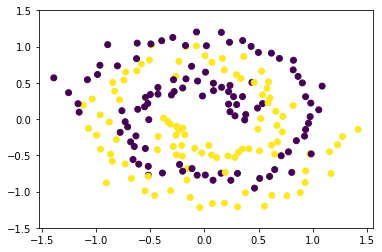

In [5]:
# =================================================================
# =================================================================
# Plots
# Plot Spiral        
plt.scatter(data_points[:,0], data_points[:,1], c=colors)
axes = plt.gca()
axes.set_ylim([-1.5,1.5])
plt.show()
# =================================================================
# =================================================================


In [6]:
# Typical train test split
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
     data_points, onehot_encoded, test_size=0.2, random_state=42)

print("train set size is {}".format(train_x.shape))
print("train set size is {}".format(test_x.shape))


train set size is (160, 2)
train set size is (40, 2)


In [7]:
## Initialize Training Parameters
learning_rate = 0.1
num_steps = 4
batch_size = 40
display_step = 1
EPOCHS = 100
# Network Parameters
n_hidden_1 = 80 # 1st layer number of neurons
n_hidden_2 = 80 # 2nd layer number of neurotest_t[45:44]ns
#n_hidden_3 = 50
num_input = 2 # Spiral data input 2-D points
num_classes = 2 # Total classes (red or black)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [8]:
## Initialize Layer Weights
# Store layers weight & bias
weights = {
    #'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    #'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    #'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([num_input, num_classes]))
}
biases = {
    #'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    #'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    #'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}
## =================================================================
## =================================================================
## Create model
def neural_net(x):
    # Hidden fully connected layer 
    #layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Hidden fully connected layer 
    #layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(x, weights['out']) + biases['out']
    return out_layer



In [9]:
## Construct model
logits = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
# if you want to use regulariztion
# regularizer = tf.nn.l2_loss(weights)
# loss = tf.reduce_mean(loss_op + beta * regularizer)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))# cast to new data type


In [10]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
## =================================================================
## =================================================================
## Start training
sess=tf.Session()
# Run the initializer
sess.run(init)
for kk in range(1,EPOCHS):
    for step in range(1, num_steps+1):## check num_steps batch_sixe !!!!!!!
        batch_x, batch_y = train_x[(batch_size)*(step-1)+1:batch_size*(step),],train_y[(batch_size)*(step-1)+1:batch_size*(step),]  #mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
##        if step % display_step == 0 or step == 1:
##             Calculate batch loss and accuracy
##            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
##                                                                    Y: batch_y})
##            print("Step " + str(step) + ", Minibatch Loss= " + \
##                      "{:.4f}".format(loss) + ", Training Accuracy= " + \
##                      "{:.3f}".format(acc))

    loss = sess.run(loss_op, feed_dict={X: train_x, Y: train_y})
    print("Epoch " + str(kk) + ", Training Loss= " + "{:.4f}".format(loss))
    acc_train = sess.run(correct_pred, feed_dict={X: train_x, Y: train_y})
    print("Training Accuracy=" + str(np.sum(acc_train)/len(acc_train)))
    acc_test = sess.run(correct_pred, feed_dict={X: test_x, Y: test_y})
    print("Test Accuracy=" + str(np.sum(acc_test)/len(acc_test)))

# Calculate accuracy for MNIST test images
#print("Testing Accuracy:", \
#sess.run(accuracy, feed_dict={X: test_x, Y: test_y})

Epoch 1, Training Loss= 0.7384
Training Accuracy=0.63125
Test Accuracy=0.675
Epoch 2, Training Loss= 0.6916
Training Accuracy=0.63125
Test Accuracy=0.675
Epoch 3, Training Loss= 0.6733
Training Accuracy=0.60625
Test Accuracy=0.7
Epoch 4, Training Loss= 0.6627
Training Accuracy=0.65625
Test Accuracy=0.625
Epoch 5, Training Loss= 0.6687
Training Accuracy=0.5625
Test Accuracy=0.55
Epoch 6, Training Loss= 0.6683
Training Accuracy=0.5625
Test Accuracy=0.525
Epoch 7, Training Loss= 0.6619
Training Accuracy=0.625
Test Accuracy=0.675
Epoch 8, Training Loss= 0.6608
Training Accuracy=0.65625
Test Accuracy=0.675
Epoch 9, Training Loss= 0.6614
Training Accuracy=0.65625
Test Accuracy=0.65
Epoch 10, Training Loss= 0.6613
Training Accuracy=0.64375
Test Accuracy=0.65
Epoch 11, Training Loss= 0.6612
Training Accuracy=0.6375
Test Accuracy=0.65
Epoch 12, Training Loss= 0.6604
Training Accuracy=0.6375
Test Accuracy=0.65
Epoch 13, Training Loss= 0.6598
Training Accuracy=0.65
Test Accuracy=0.65
Epoch 14, Tr

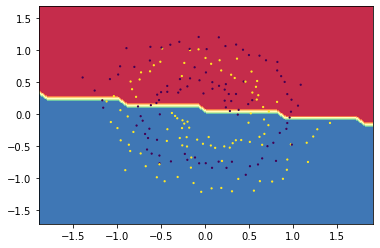

In [11]:
X = data_points
W0 = sess.run(weights)['out']
B0 = sess.run(biases)['out']
def neural_net_plot(X, W0, B0):# (*)(X,W0, W1, W3, B0, B1, B3):
    # Hidden fully connected layer with 200 neurons
    #(*)layer_1 = np.maximum(np.matmul(X, W0)+ B0, 0)
    # Hidden fully connected layer with 200 neurons
    #(*)layer_2 = np.maximum(np.matmul(layer_1, W1) + B1,0)
    # Output fully connected layer with a neuron for each class
    #layer_3 = np.maximum(np.matmul(layer_2, W2) + B2,0)
    # Output fully connected layer with a neuron for each class
    # (*) logits = np.matmul(layer_2, W3) + B3
    logits = np.matmul(X, W0) + B0
    out_layer = np.argmax(logits, 1)
    return out_layer


# Helper function to plot a decision boundary.
def plot_decision_boundary(neural_net_plot, X, W0, B0, col):#(*)(neural_net_plot, X, W0, W1, W3, B0, B1, B3, col)
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    x_min = np.float32(x_min)
    x_max = np.float32(x_max)
    y_min = np.float32(y_min)
    y_max = np.float32(y_max)
    h = 0.1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    xx = np.float32(xx)
    yy = np.float32(yy)
    #(*)Z = neural_net_plot(np.c_[xx.ravel(), yy.ravel()], W0, W1,  W3, B0, B1,  B3)
    Z = neural_net_plot(np.c_[xx.ravel(), yy.ravel()], W0, B0)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=1.5, c=col)
    plt.show()


#(*)plot_decision_boundary(neural_net_plot, X, W0, W1,  W3, B0, B1, B3, colors)
plot_decision_boundary(neural_net_plot, X, W0, B0, colors)

In [12]:
## =================================================================
## =================================================================
## Evaluate specific variables

W0 = sess.run(weights)['out']
B0 = sess.run(biases)['out']
np.savetxt('Weight.txt', W, delimiter=',')


## get intermediate things
def neural_net_forget(x):
    # Hidden fully connected layer with 200 neurons
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return biases['b1'], weights['out'], biases['out']

midbias, lastweight, lastbias = sess.run(neural_net_forget(train_x))
np.savetxt('midbias.txt', midbias, delimiter=',')
np.savetxt('lastweight.txt', lastweight, delimiter=',')
np.savetxt('lastbias.txt', lastbias, delimiter=',')
np.savetxt('train_y.txt', train_y, delimiter=',')


NameError: name 'W' is not defined

## Compare with RF

In [67]:
from sklearn.ensemble import RandomForestClassifier
k = 7
clf = RandomForestClassifier(criterion='entropy', max_depth=k)
# params: n_estimators=100 (number of trees in the forest), criterion (eg entropy),
# max_features how many features at each split defualt max_features=sqrt(n_features)
clf.fit(train_x, train_y)
predict_labels = clf.predict(test_x)
predict_labels_temp = np.argmax(predict_labels, axis = 1)
test_y_temp = np.argmax(test_y, axis = 1)
#IPython.embed()

print("Accuracy of decision tree is {}".format(sum(predict_labels_temp==test_y_temp)/len(test_y_temp)))


Accuracy of decision tree is 0.675
